In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

FIELLER: calculates confidence limits for a ratio according Fieller's theorem. Output includes the approximate SD of the ratio r = a / b, given the SD of a (the numerator) and of b (the denominator) and the correlation coefficient between a & b (zero if they are independent). 
Fieller requires the t-statistic which can be provided from a table or calculated from alpha and the degrees of freedom. Alpha-level deviation is for two tailed distribution (e.g. 0.05 leaves 90% area).

In [3]:
from dcstats.fieller import Fieller

In [4]:
a, b = 14, 7 # Nominator and denominator
sa, sb = 3, 2 # SD of nominator and denominator
r = 0 # Correlation coefficient (a,b)
alpha = 0.05 # alpha
n = 12 # Total number of observations na + nb

In [5]:
flr = Fieller(a, b, sa, sb, r, alpha, n)

In [6]:
print(flr)


 Fieller calculation result: 
 Ratio (=a/b) = 2.000000
 g = 0.268164;
 alpha = 0.05;
 degree of freedom  = 10;
 t(df, alpha) = 1.812461

 Confidence limits: lower 1.051413, upper 4.414296
 i.e deviations: lower -0.948587, upper 2.414296
 Approximate SD of ratio = 0.714286
 Approximate CV of ratio (%) = 35.714286
 Approximate limits: lower 0.705385, upper 0.705385


##### Some explorations below

Following are results from GraphPad calculator:   
https://www.graphpad.com/quickcalcs/errorProp2/

 CI of a sum, difference, quotient or product
Mean of Variable A divided by Mean of Variable B = 2.00

|         |                    |
|---------|--------------------|
| 90% CI: |   1.54 	to 	2.64   |
| 95% CI: |   1.46 	to 	2.83   |
| 99% CI: |	  1.27 	to 	3.36   |

These results assume that both variables follow a Gaussian distribution
and that the measurements of Variable A are not paired or matched to
measurements of Variable B.

Results computed by the method of EC Fieller, Suppl to
J.R.Statist.Soc, 7,1-64 summarized here .

|     |  Variable A  |  Variable B   |
|-----|--------------|---------------|
|Mean |	  14.00      |    7.00       |
|SD   |   3.00 	     |    2.00       |
|SEM  |	  1.22 	     |    0.82       |
|N 	  |    6 	     |     6         |

Wikipedia:   https://en.wikipedia.org/wiki/Fieller%27s_theorem

In [7]:
T1 = np.random.normal(loc=14.0, scale=3.0, size=6)
T1

array([13.14091005, 11.6772464 , 15.1103116 , 14.64138597, 11.94855707,
       10.25691651])

In [8]:
T2 = np.random.normal(loc=7.0, scale=2.0, size=6)
T2

array([10.88919135,  5.67640091,  8.57467997,  8.74336928,  7.94344923,
        4.23068628])

In [9]:
np.mean(T1) / np.mean(T2)

1.6669351538403139

In [10]:
def bootstrap_ratio(S1, S2, runs=5000):
    ratios = np.zeros(runs)
    #mean = np.mean(S)
    for i in range(runs):
        a = np.mean(np.random.choice(S1, size=len(S1), replace=True))
        b = np.mean(np.random.choice(S2, size=len(S2), replace=True))
        ratios[i] = a / b
    ratios.sort()
    return ratios

In [11]:
repeats = 500000
booted = bootstrap_ratio(T1, T2, repeats)

In [12]:
ratio_of_means = np.mean(T1) / np.mean(T2)
print('ratio= {0:.3f}; bootstrapped mean= {1:.3f}; bias= {2:.3f}'.
     format(ratio_of_means, np.mean(booted), ratio_of_means-np.mean(booted)))
print('bootstrapped SDM= {0:.3f}'.format(np.std(booted, ddof=1)))

ratio= 1.667; bootstrapped mean= 1.690; bias= -0.023
bootstrapped SDM= 0.225


In [13]:
lower95CI = booted[int(0.025 * repeats)]
upper95CI = booted[int(0.975 * repeats)]
print('95% confidence limits (bootstrapping): lower= {0:.3f}; upper= {1:.3f}'
      .format(lower95CI, upper95CI))

95% confidence limits (bootstrapping): lower= 1.325; upper= 2.203


Black solid line: original sample mean
Black dashed line: bootstrap mean
Red dashed lines: lower and upper 95% confidence limits


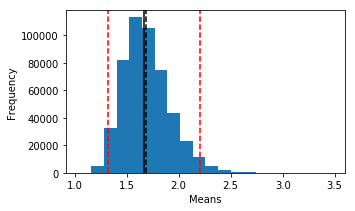

In [14]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(booted, 20)
ax.axvline(x=ratio_of_means, color='k')
ax.axvline(x=np.mean(booted), color='k', linestyle="dashed")
ax.axvline(x=lower95CI, color='r', linestyle="dashed")
ax.axvline(x=upper95CI, color='r', linestyle="dashed")
ax.set_ylabel("Frequency")
ax.set_xlabel('Means')
print('Black solid line: original sample mean')
print('Black dashed line: bootstrap mean')
print('Red dashed lines: lower and upper 95% confidence limits')